In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Audio

import librosa
import librosa.display
import IPython.display as ipd

from PIL import Image
import pathlib
from os import path
from pydub import AudioSegment

from itertools import cycle
import seaborn as sns
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

# audioni yuklash

In [3]:
y, sr = librosa.load('/kaggle/input/taxi-uz-voice/02012023_120147_998770021318_712316143_c9d4a8ad_22bc_4df9_8e8c_3b536f206da9.mp3', duration=120)


# magnituda va fazani hisoblash
S_full, phase = librosa.magphase(librosa.stft(y))

# audioni ijro etish
Audio(data=y[1*sr:22*sr], rate=sr)

/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


# chromagram

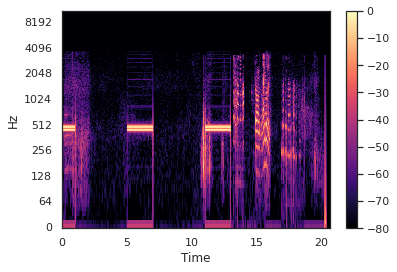

In [4]:
import librosa.display
idx = slice(*librosa.time_to_frames([1, 22],sr=sr))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr, ax=ax)
fig.colorbar(img, ax=ax)

# filter yasash

In [5]:
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))

# Filtrning chiqishi kirishdan katta bo'lmasligi kerak
# agar biz signallarni qo'shimcha deb hisoblasak. Nuqtaviy minimalni olish
# kirish spektri bilan buni majbur qiladi.
S_filter = np.minimum(S_full, S_filter)

In [6]:
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)

# Maskalarni olganimizdan so'ng, ularni kirish spektri bilan ko'paytiring
# komponentlarni ajratish uchun

S_foreground = mask_v * S_full
S_background = mask_i * S_full

<Figure size 1152x720 with 0 Axes>

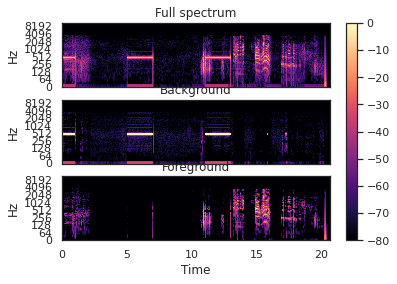

In [8]:
plt.figure(figsize=(16,10))
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr, ax=ax[0])
ax[0].set(title='Full spectrum')
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S_background[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr, ax=ax[1])
ax[1].set(title='Background')
ax[1].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S_foreground[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr, ax=ax[2])
ax[2].set(title='Foreground')
fig.colorbar(img, ax=ax)
plt.show()

In [9]:
y_foreground = librosa.istft(S_foreground * phase)

# tozalangan audioni olish
audio1=Audio(data=y_foreground, rate=sr)

In [10]:
audio1

# Yuklab olish

In [11]:
data=librosa.istft(S_foreground * phase)
samplerate=22050

In [12]:
import soundfile as sf
data,samplerate
sf.write('audio_1.wav',data,samplerate,format='wav',subtype='PCM_24')

# kesish ovoz yo'q joyni

In [13]:
audio='/kaggle/working/audio_1.wav'

In [14]:
y, sr = librosa.load(audio)
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [0.00299537 0.00313735 0.00317645 0.00329137 0.00347579 0.00358284
 0.00348234 0.00317943 0.00279582 0.00244951]
shape y: (476160,)
sr: 22050


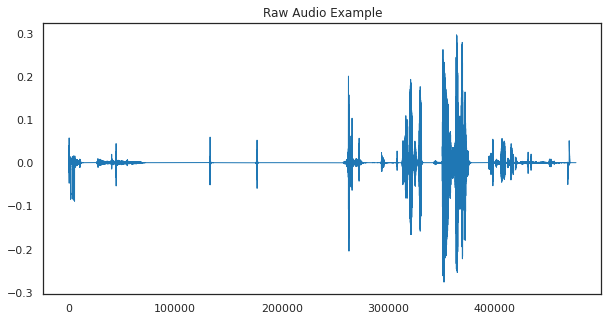

In [17]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

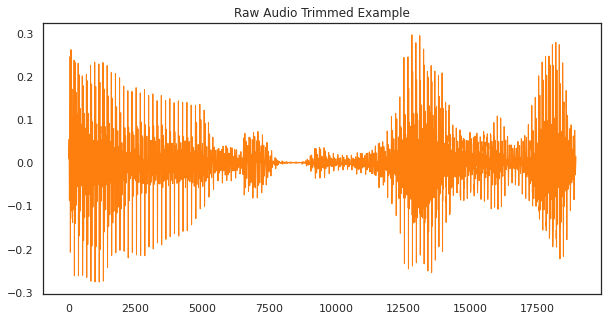

In [22]:
y_trimmed, _ = librosa.effects.trim(y, top_db=3)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()

In [23]:
sf.write('audio_11.wav',y_trimmed,samplerate,format='wav',subtype='PCM_24')

In [24]:
Audio(data=y_trimmed,rate=sr)